# Sparse processing in data sets of four recommender systems

Xiaolan Li

This project mainly determine the sparsity to 4 recommender system datasets. 

I will do a basic recommender system for each dataset as follows:

1. By using the mean of ratings after standar scaler the dataset in Joskster.
2. By using content/collaborative/hybrid filtering in Movielens
3. By using content/collaborative/hybrid filtering in MovieSurvey.
3. By using collaborative filtering in BookCrossing.

# 1. Jokester

The dataset I choose is "jester-data-1.zip", which can be found [here](https://goldberg.berkeley.edu/jester-data/), includes Data from 24,983 users who have rated 36 or more jokes, a matrix with dimensions 24983 X 101.

In [1]:
import pandas as pd
import numpy as np
df_Jokester = pd.read_excel('https://github.com/xiaolancara/Recommender-System/blob/main/data/jester-data-1.xls?raw=true',header=None)
df_Jokester.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00


In [2]:
df_Jokester.shape

(24983, 101)

In [3]:
# check null value
df_Jokester.isnull().values.sum()

0

### Data preprocessing

In [4]:
df_Jokester.rename(columns = {0: 'userRatingTimes'}, inplace = True)
df_Jokester.head()

,userRatingTimes,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
#Replace all 99.0 ratings as nan
Rating = df_Jokester.iloc[:,1:].replace(99.00, np.nan)
Rating.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Calculate sparsity from joke dataset.

In [6]:
num_jokeUsers = Rating.shape[0]
num_jokes = Rating.shape[1]
Joke_matrixSparsity = 1 - sum(df_Jokester.iloc[:,0]) / (num_jokeUsers * num_jokes)

print('rating:{}, num_jokeUsers:{}, num_jokes:{}'.format(sum(df_Jokester.iloc[:,0]), num_jokeUsers, num_jokes))
Joke_matrixSparsity

rating:1810455, num_jokeUsers:24983, num_jokes:100


0.27532522115038227

### Missing data fill up

In [7]:
# check the missing rating percentage for each joke
Rating.isnull().sum()/Rating.shape[0]

1      0.341472
2      0.272145
3      0.333867
4      0.375255
5      0.000240
         ...   
96     0.584918
97     0.578914
98     0.573070
99     0.563303
100    0.602009
Length: 100, dtype: float64

In [8]:
# using the mean value for each column to fill the nan value
Rating = Rating.apply(lambda x: x.fillna(x.mean()),axis=0)
Rating

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.820000,8.79000,-9.660000,-8.160000,-7.52,-8.500000,-9.85,4.17,-8.980000,-4.760000,...,2.820000,1.179744,2.504041,1.173482,1.03913,1.528003,-5.63000,0.767692,-0.031244,1.354711
1,4.080000,-0.29000,6.360000,4.370000,-2.38,-9.660000,-0.73,-5.34,8.880000,9.220000,...,2.820000,-4.950000,-0.290000,7.860000,-0.19000,-2.140000,3.06000,0.340000,-4.320000,1.070000
2,0.904573,0.20846,0.316574,-1.449114,9.03,9.270000,9.03,9.27,-0.557031,1.301231,...,2.038527,1.179744,2.504041,9.080000,1.03913,1.528003,1.67375,0.767692,-0.031244,1.354711
3,0.904573,8.35000,0.316574,-1.449114,1.80,8.160000,-2.82,6.21,-0.557031,1.840000,...,2.038527,1.179744,2.504041,0.530000,1.03913,1.528003,1.67375,0.767692,-0.031244,1.354711
4,8.500000,4.61000,-4.170000,-5.390000,1.36,1.600000,7.04,4.61,-0.440000,5.730000,...,5.190000,5.580000,4.270000,5.190000,5.73000,1.550000,3.11000,6.550000,1.800000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.440000,7.43000,9.080000,2.330000,3.20,6.750000,-8.79,-0.53,-8.740000,7.230000,...,8.830000,-1.210000,9.220000,-6.700000,8.45000,9.030000,6.55000,8.690000,8.790000,7.430000
24979,9.130000,-8.16000,8.590000,9.080000,0.87,-8.930000,-3.50,5.78,-8.110000,4.900000,...,-1.170000,-5.730000,-1.460000,0.240000,9.22000,-8.200000,-7.23000,-8.590000,9.130000,8.450000
24980,0.904573,0.20846,0.316574,-1.449114,-7.77,1.594447,6.70,-6.75,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.03913,1.528003,1.67375,0.767692,-0.031244,1.354711
24981,0.904573,0.20846,0.316574,-1.449114,-9.71,1.594447,4.56,-8.30,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.03913,1.528003,1.67375,0.767692,-0.031244,1.354711


In [9]:
Rating.describe()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,0.904573,0.208460,0.316574,-1.449114,0.403556,1.594447,-0.429662,-0.624085,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
std,4.196857,4.775291,4.407114,4.137463,5.255069,4.431641,5.495160,4.928947,4.098994,4.588521,...,3.148552,3.225735,2.915620,3.284387,3.311973,3.125948,3.260741,3.524231,3.420903,3.343741
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,-0.830000,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
50%,0.904573,0.208460,0.316574,-1.449114,1.120000,1.594447,-0.050000,-0.290000,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
75%,3.135000,3.250000,2.720000,-0.050000,4.470000,4.660000,3.880000,3.060000,1.260000,4.470000,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
max,9.370000,9.370000,9.370000,9.370000,9.370000,9.470000,9.610000,9.760000,9.900000,9.370000,...,9.560000,9.420000,9.370000,9.420000,9.370000,9.370000,9.370000,9.370000,9.370000,9.370000


Since the distribution of Rating Matrix is not normalized. It should be standard scaler to transform the data that it's distribution will have mean of 0 and standard deviation of 1. 

In [10]:
#Fit StandardScaler into ratings
from sklearn.preprocessing import StandardScaler
ratings_ss = StandardScaler().fit_transform(Rating)
ratings_ss

array([[-2.07887686e+00,  1.79710763e+00, -2.26378852e+00, ...,
        -6.30063878e-17, -4.05684260e-17,  4.64851549e-16],
       [ 7.56635406e-01, -1.04385177e-01,  1.37131617e+00, ...,
        -1.21359900e-01, -1.25371630e+00, -8.51490952e-02],
       [-3.43904731e-16, -5.23120316e-17,  2.51921156e-17, ...,
        -6.30063878e-17, -4.05684260e-17,  4.64851549e-16],
       ...,
       [-3.43904731e-16, -5.23120316e-17,  2.51921156e-17, ...,
        -6.30063878e-17, -4.05684260e-17,  4.64851549e-16],
       [-3.43904731e-16, -5.23120316e-17,  2.51921156e-17, ...,
        -6.30063878e-17, -4.05684260e-17,  4.64851549e-16],
       [ 3.63476143e-01,  5.15484725e-01, -9.74937422e-01, ...,
        -6.30063878e-17, -4.05684260e-17,  4.64851549e-16]])

In [11]:
# calculate the mean value for each joke to do further recommendation
mean_ratings = ratings_ss.mean(axis = 0)
mean_ratings

array([-4.92030154e-17,  1.21229973e-17, -3.12851543e-17,  2.73034074e-17,
        4.69277314e-18, -3.98174691e-18, -2.68767916e-17,  1.96243240e-17,
        6.04372299e-17, -2.38904814e-17, -1.58558850e-17, -1.99798372e-17,
        1.51804101e-17,  4.16661373e-17,  4.55056790e-18,  1.25211720e-16,
       -8.12347472e-18,  2.60235601e-17, -2.40326867e-17,  1.64958086e-17,
        6.66942607e-17,  1.10920092e-17, -1.99087345e-17, -3.88220324e-17,
        5.68820987e-18,  1.49315509e-17, -5.47845713e-17,  2.27528395e-17,
        3.98174691e-17,  3.10007438e-17,  1.00112494e-16,  9.20067946e-17,
        2.95075887e-17, -2.84410493e-18, -3.22094884e-17, -6.61254397e-18,
        1.23718565e-17,  6.00106141e-17, -3.29205146e-17, -1.84866821e-17,
       -8.53231480e-18, -1.03098804e-17, -5.97262036e-18, -2.95786913e-17,
        4.49368580e-17, -5.17627098e-17,  6.18592823e-17, -6.11482561e-18,
        1.02387778e-16,  2.65923811e-17,  5.97262036e-18,  4.26615740e-18,
       -1.87710926e-17, -

### Top joke recommendation

In [12]:
#Convert array into Dataframe and rename column name
mean_ratings = pd.DataFrame(mean_ratings)
mean_ratings.rename(columns = {0: 'mean_joke_ratings'}, inplace = True) 
mean_ratings['jokeId']= mean_ratings.index + 1
mean_ratings.sort_values(ascending = False, by = 'mean_joke_ratings' ).head(10)

,mean_joke_ratings,jokeId
57,1.686554e-16,58
15,1.252117e-16,16
90,1.232919e-16,91
81,1.069383e-16,82
48,1.023878e-16,49
30,1.001125e-16,31
31,9.200679e-17,32
61,8.973151e-17,62
96,8.127030e-17,97
84,7.807068e-17,85


# 2. MovieLens 

The dataset I choose is Small 1MB, which can be found [here](https://grouplens.org/datasets/movielens/): 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018. The actual data up to date are more than that numbers.

### Reading datasets

In [13]:
import pandas as pd
df_Movie = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Recommender-System/main/data/ml-latest-small/ml-latest-small/movies.csv')
df_Movie.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [14]:
# replace symbol to space
df_Movie['genres'] = df_Movie['genres'].str.replace('|',' ')
df_Movie.shape

(9742, 3)

In [15]:
df_Tag = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Recommender-System/main/data/ml-latest-small/ml-latest-small/tags.csv')
df_Tag.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [16]:
df_Tag.drop(['timestamp'],1, inplace=True)
df_Tag.shape

(3683, 3)

In [17]:
# read Rating database
df_Rating = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Recommender-System/main/data/ml-latest-small/ml-latest-small/ratings.csv')
df_Rating.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [18]:
df_Rating.drop(['timestamp'],1, inplace=True)
df_Rating.shape

(100836, 3)

### Calculate sparsity from movie_rating dataset.

In [19]:
# merging both the datasets on 'movieId' column
df_movie_rating = pd.merge(df_Movie, df_Rating, on="movieId").sort_values(by = 'userId')
df_movie_rating.tail(3)

,movieId,title,genres,userId,rating
97036,111663,Zombeavers (2014),Action Comedy Horror,610,3.5
98181,122886,Star Wars: Episode VII - The Force Awakens (2015),Action Adventure Fantasy Sci-Fi IMAX,610,4.5
67040,5418,"Bourne Identity, The (2002)",Action Mystery Thriller,610,4.0


In [20]:
df_movie_rating.shape

(100836, 5)

In [21]:
num_movieUsers = df_movie_rating.userId.unique().shape[0]
num_movies = df_movie_rating.movieId.unique().shape[0]

#Calculate sparse rate
Movie__matrixSparsity = 1 - len(df_movie_rating) / (num_movieUsers * num_movies)

print('rating:{}, num_movieUsers:{}, num_movies:{}'.format(len(df_movie_rating), num_movieUsers, num_movies))
print('Movie__matrixSparsity:', Movie__matrixSparsity)

rating:100836, num_movieUsers:610, num_movies:9724
Movie__matrixSparsity: 0.9830003169443864


### Exploring the counts of movie group by each user.

In [22]:
rating_count = df_movie_rating.groupby('userId', as_index=False).agg({'movieId': 'count'}).sort_values(by = 'movieId', ascending=False)
rating_count.head()

,userId,movieId
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346


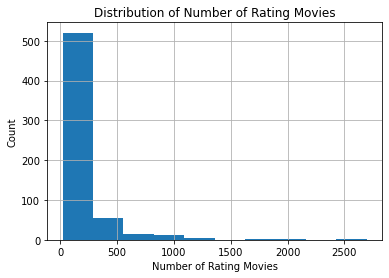

In [23]:
import matplotlib.pyplot as plt

plt.xlabel('Number of Rating Movies')
plt.ylabel('Count')
plt.title('Distribution of Number of Rating Movies')
rating_count.movieId.hist()

In [24]:
rating_count.movieId.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

On average, users rated 165 movies. There are 75% users rated less than 168 movies. 

Interestingly, all users have rated at least 20 movies. This is useful when making the train and test data to evaluate our models.

### Exploring the average rating group by each movie.

In [25]:
avg_rating_movies = df_movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_rating_movies.head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

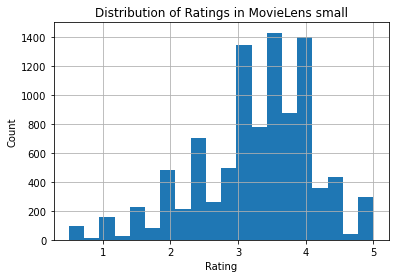

In [26]:
avg_rating_movies.hist(bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in MovieLens small')
plt.show()

This distribution looks like a normal distribution. Movies with ratings of 3 to 4 are the majority.

### Content filter: Create movie-content filtering

In [27]:
# merge movie genres from each users and tags on movie Id

df_MovieTag = pd.merge(df_Movie, df_Tag, on='movieId', how='left')
df_MovieTag.head(3)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,336.0,pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,474.0,pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,567.0,fun


In [28]:
df_MovieTag.shape

(11853, 5)

In [29]:
# combine all tag words for each movie
df_MovieTag.fillna("", inplace=True)
df_MovieTag = pd.DataFrame(df_MovieTag.groupby('movieId')['tag'].apply(
                                          lambda x: "%s" % ' '.join(x)))
df_MovieTag.head()

,tag
movieId,
1,pixar pixar fun
2,fantasy magic board game Robin Williams game
3,moldy old
4,
5,pregnancy remake


In [30]:
# get the same list of movieId to compare the content and further collaborative filter
movie_list_rating = df_movie_rating.movieId.unique().tolist()

In [31]:
Final = pd.merge(df_Movie[df_Movie.movieId.isin(movie_list_rating)], df_MovieTag, on='movieId', how='left')
Final.head(3)

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old


In [32]:
# create content data from tags and genres
Final ['contentData'] = Final[['tag', 'genres']].apply(
                                          lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','contentData']].head(3)

,movieId,title,contentData
0,1,Toy Story (1995),pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),moldy old Comedy Romance


In [33]:
Final.shape

(9724, 5)

Next, Using TfidfVectorizer to find the feature vectors that describe the movies

In [34]:
# tf-idf vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['contentData'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
print(tfidf_df.shape)

(9724, 1675)


Since there are 1675 features, I'll use SVD tool to reduce dimensionality of the feature matrix especially when applied on Tf-idf vectors

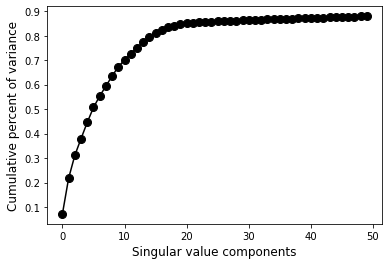

In [35]:
# Compress with SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)
latent_matrix_content = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='black')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [36]:
# select only 50 number of latent dimensions
n = 50 
df_latent_matrix_content = pd.DataFrame(latent_matrix_content[:,0:n], index=Final.title.tolist())

In [37]:
df_latent_matrix_content.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Toy Story (1995),0.102057,0.082978,0.069335,0.079509,-0.158595,0.010457,0.236075,-0.009400,-0.122104,-0.007205,...,-0.000903,-0.005082,0.005566,-0.001768,0.003905,0.008627,0.000525,-0.002894,0.008714,-0.003459
Jumanji (1995),0.032439,0.008862,0.058857,0.083238,-0.113069,0.006432,0.189288,-0.006319,-0.075254,0.002481,...,-0.002857,-0.004774,0.000510,-0.003908,-0.002690,0.005482,-0.010894,0.002657,0.004782,0.014137
Grumpier Old Men (1995),0.148065,0.105199,-0.043035,0.129036,0.089151,-0.036802,-0.011756,0.000640,0.004622,-0.002389,...,0.000092,0.000021,-0.000192,-0.000123,-0.000052,-0.000026,-0.000297,0.000020,-0.000267,-0.000011
Waiting to Exhale (1995),0.826327,0.065701,-0.292544,0.395697,0.244308,-0.073107,-0.045514,-0.000915,0.027719,-0.001197,...,0.000112,0.000007,-0.000633,-0.000486,-0.000218,-0.000262,-0.000892,0.000232,-0.000777,0.000015
Father of the Bride Part II (1995),0.112884,0.121158,-0.006244,-0.037840,-0.004575,0.009908,-0.009223,-0.002305,0.003880,-0.011430,...,0.006704,0.021820,-0.012740,-0.006673,0.023064,0.017342,-0.052285,0.055305,-0.027490,0.153428


In [38]:
latent_matrix_content.shape

(9724, 50)

### Creating a collaborative latent matrix from user ratings:

Transform the dataframe from long to wide

In [39]:
df_MovieRating_pivot = df_movie_rating.pivot(index ='movieId', columns ='userId', values = 'rating').fillna(0)

In [40]:
print(df_MovieRating_pivot.shape)
df_MovieRating_pivot.head(3)

(9724, 610)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [41]:
# using SVD to compress 
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)
latent_matrix_coll = svd.fit_transform(df_MovieRating_pivot)
df_latent_matrix_coll = pd.DataFrame(
                             latent_matrix_coll,
                             index=Final.title.tolist())

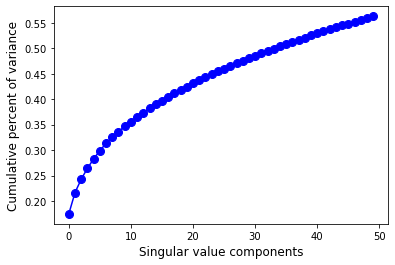

In [42]:
# plot variance explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='Blue')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

### Running a content / collaborative and hybrid cosine Similarity

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(df_latent_matrix_content.loc['Grapes of Wrath, The (1940)']).reshape(1, -1)
a_2 = np.array(df_latent_matrix_coll.loc['Grapes of Wrath, The (1940)']).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(df_latent_matrix_content, a_1).reshape(-1)
score_2 = cosine_similarity(df_latent_matrix_coll, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
similar = pd.DataFrame(dictDf, index = df_latent_matrix_content.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar.head(11)
#similar[1:].head(11)

,content,collaborative,hybrid
"Grapes of Wrath, The (1940)",1.000000,1.000000,1.000000
Amadeus (1984),0.999992,0.531309,0.765650
Little Women (1994),0.999991,0.150623,0.575307
House of Sand and Fog (2003),0.999991,0.565677,0.782834
Little Man Tate (1991),0.999991,0.306750,0.653371
Reversal of Fortune (1990),0.999991,0.537425,0.768708
They Drive by Night (1940),0.999991,0.595363,0.797677
"Good Earth, The (1937)",0.999991,0.633432,0.816711
Coal Miner's Daughter (1980),0.999991,0.556734,0.778363
"Whole Wide World, The (1996)",0.999991,0.467654,0.733823


### Use matrix factorization model

In [44]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [45]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_Rating[['userId','movieId','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.8811


0.8810815293040639

In [46]:
# map movie to id:
Mapping_file = dict(zip(df_Movie.title.tolist(), df_Movie.movieId.tolist()))

In [47]:
def pred_user_rating(ui):
    if ui in df_Rating.userId.unique():
        ui_list = df_Rating[df_Rating.userId == ui].movieId.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [48]:
user_id = 1
pred_user_rating(user_id)

,ratings
movies,
Notorious (1946),5.0
Lawrence of Arabia (1962),5.0
"Godfather: Part II, The (1974)",5.0
There Will Be Blood (2007),5.0
"Christmas Story, A (1983)",5.0
Ran (1985),5.0
Casablanca (1942),5.0
"Dark Knight, The (2008)",5.0
Life Is Beautiful (La Vita è bella) (1997),5.0


# 3. Survey Dataset (6 movies rating) 

The movie Survey Data is about the rating from 5 users to 6 popular movies. The Survey can be found [here](https://www.surveymonkey.com/r/JZ6XPCZ). The response data is created as a dataset includes two tables on PostgreSql can be found from my [Github](https://github.com/xiaolancara/Recommender-System/tree/main/data/Movie_Survey).

### Reading dataset

In [49]:
df_rating = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Recommender-System/main/data/Movie_Survey/MovieSurvey_Rating.csv')
df_rating

,userid,movieid,ratings
0,1,1,5
1,1,2,5
2,1,3,3
3,1,4,5
4,2,1,3
5,2,2,4
6,2,3,1
7,2,4,5
8,2,5,5
9,2,6,4


In [50]:
df_movie = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Recommender-System/main/data/Movie_Survey/MovieSurvey_Tag.csv')
df_movie

,movieid,movietiltle,tag
0,1,Forrest Gump,Romance
1,2,Joker,"Crime, Thriller"
2,3,Avengers: Endgame,"Action, Adventure"
3,4,Spirited Away,"Crime, Animation"
4,5,Parasite,"Comedy, Thriller"
5,6,Soul,"Animation, Adventure, Comedy"


### Sparsity Determination

In [51]:
num_Sur_movieUsers = df_rating.userid.unique().shape[0]
num_Sur_movies = df_movie.movieid.unique().shape[0]

#Calculate sparse rate
Movie__matrixSparsity = 1 - len(df_rating) / (num_Sur_movieUsers * num_Sur_movies)

print('rating:{}, num_movieUsers:{}, num_movies:{}'.format(len(df_rating), num_Sur_movieUsers, num_Sur_movies))
print('Movie__matrixSparsity:', Movie__matrixSparsity)

rating:24, num_movieUsers:5, num_movies:6
Movie__matrixSparsity: 0.19999999999999996


### Content Filtering

In [52]:
# replace symbol to space
df_movie['tag'] = df_movie['tag'].str.replace(',',' ')
df_movie.shape

(6, 3)

In [53]:
# tf-idf vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movie['tag'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=df_movie.movietiltle)
print(tfidf_df.shape)

(6, 7)


In [54]:
tfidf_df

,0,1,2,3,4,5,6
movietiltle,,,,,,,
Forrest Gump,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
Joker,0.000000,0.000000,0.000000,0.000000,0.707107,0.0,0.707107
Avengers: Endgame,0.773262,0.634086,0.000000,0.000000,0.000000,0.0,0.000000
Spirited Away,0.000000,0.000000,0.707107,0.000000,0.707107,0.0,0.000000
Parasite,0.000000,0.000000,0.000000,0.707107,0.000000,0.0,0.707107
Soul,0.000000,0.577350,0.577350,0.577350,0.000000,0.0,0.000000


### Collaborative filtering

In [55]:
# merging both the datasets on 'movieid' column
df_survey_movie_rating = pd.merge(df_movie, df_rating, on="movieid").sort_values(by = 'userid')
df_survey_movie_rating

,movieid,movietiltle,tag,userid,ratings
0,1,Forrest Gump,Romance,1,5
5,2,Joker,Crime Thriller,1,5
8,3,Avengers: Endgame,Action Adventure,1,3
13,4,Spirited Away,Crime Animation,1,5
1,1,Forrest Gump,Romance,2,3
20,6,Soul,Animation Adventure Comedy,2,4
6,2,Joker,Crime Thriller,2,4
9,3,Avengers: Endgame,Action Adventure,2,1
17,5,Parasite,Comedy Thriller,2,5
14,4,Spirited Away,Crime Animation,2,5


In [56]:
df_Sur_MovieRating_pivot = df_survey_movie_rating.pivot(index ='movieid', columns ='userid', values = 'ratings').fillna(0)

In [57]:
print(df_Sur_MovieRating_pivot.shape)
df_Sur_MovieRating_pivot.head(6)

(6, 5)


userid,1,2,3,4,5
movieid,,,,,
1,5.0,3.0,4.0,4.0,5.0
2,5.0,4.0,0.0,3.0,0.0
3,3.0,1.0,4.0,4.0,2.0
4,5.0,5.0,2.0,0.0,5.0
5,0.0,5.0,4.0,3.0,0.0
6,0.0,4.0,2.0,4.0,3.0


In [58]:
# using SVD to compress 
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4)
latent_matrix_coll = svd.fit_transform(df_Sur_MovieRating_pivot)
df_latent_matrix_coll = pd.DataFrame(
                             latent_matrix_coll,
                             index=df_movie.movietiltle)

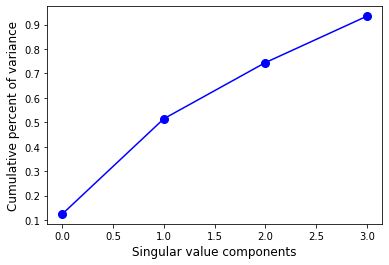

In [59]:
# plot variance explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='Blue')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

### Running a content / collaborative and hybrid cosine Similarity

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(tfidf_df.loc['Spirited Away']).reshape(1, -1)
a_2 = np.array(df_latent_matrix_coll.loc['Spirited Away']).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(tfidf_df, a_1).reshape(-1)
score_2 = cosine_similarity(df_latent_matrix_coll, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1, 'collaborative': score_2, 'hybrid': hybrid} 
similar = pd.DataFrame(dictDf, index = tfidf_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar
#similar[1:].head(11)

,content,collaborative,hybrid
movietiltle,,,
Spirited Away,1.000000,1.000000,1.000000
Joker,0.500000,0.723376,0.611688
Soul,0.408248,0.700016,0.554132
Forrest Gump,0.000000,0.863807,0.431903
Avengers: Endgame,0.000000,0.628548,0.314274
Parasite,0.000000,0.523610,0.261805


In [61]:
similar = similar.reset_index()

In [62]:
similar.merge(df_movie, on = 'movietiltle')

,movietiltle,content,collaborative,hybrid,movieid,tag
0,Spirited Away,1.000000,1.000000,1.000000,4,Crime Animation
1,Joker,0.500000,0.723376,0.611688,2,Crime Thriller
2,Soul,0.408248,0.700016,0.554132,6,Animation Adventure Comedy
3,Forrest Gump,0.000000,0.863807,0.431903,1,Romance
4,Avengers: Endgame,0.000000,0.628548,0.314274,3,Action Adventure
5,Parasite,0.000000,0.523610,0.261805,5,Comedy Thriller


From the above sample result data, the movies that similar to "Spirited Away" is Joker and Soul.

### Use matrix factorization model to fill the missing rating data

In [63]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [64]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_rating[['userid','movieid','ratings']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 1.5002


1.5002165794844493

In [65]:
# map movie to id:
Mapping_file = dict(zip(df_movie.movietiltle.tolist(), df_movie.movieid.tolist()))

In [66]:
def pred_user_rating(ui):
    if ui in df_rating.userid.unique():
        ui_list = df_rating[df_rating.userid == ui].movieid.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [67]:
df_rating.userid.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [68]:
user_id = 1
pred_user_rating(user_id)

,ratings
movies,
Parasite,4.010736
Soul,3.605736


# 4. BookCrossing Dataset 

### Reading Dataset

The dataset I choose is BookCrossing, which can be found [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/): Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

In [69]:
import pandas as pd
df_Rating = pd.read_csv(r'C:\AI program\2ndSemester\Special Topic\2nd week\BX-CSV-Dump\BX-Book-Ratings.csv', sep=";", error_bad_lines=False,encoding='latin-1')

print(df_Rating.shape)
df_Rating.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [70]:
df_Book = pd.read_csv(r'C:\AI program\2ndSemester\Special Topic\2nd week\BX-CSV-Dump\BX-Books.csv', sep=";", error_bad_lines=False,encoding='latin-1')

print(df_Book.shape)
df_Book.head(3)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


(271360, 8)


C:\Users\xiaon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [71]:
df_Users = pd.read_csv(r'C:\AI program\2ndSemester\Special Topic\2nd week\BX-CSV-Dump\BX-Users.csv', sep=";", error_bad_lines=False,encoding='latin-1')

print(df_Users.shape)
df_Users.head(3)

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [72]:
# drop columns that is not useful for this project
df_Book = df_Book.drop(['Year-Of-Publication', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
df_BookRating = df_Book.merge(df_Rating, on='ISBN')

In [73]:
### Calculate Sparsity from Book Rating Data

In [74]:
print(df_BookRating.shape)
df_BookRating.head(3)

(1031136, 6)


,ISBN,Book-Title,Book-Author,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11400,0


In [75]:
num_books = df_BookRating['Book-Title'].unique().shape[0]
num_users = df_BookRating['User-ID'].unique().shape[0]

#Calculate sparse rate
Book__matrixSparsity = 1 - len(df_BookRating) / (num_users * num_books)

print('df_BookRating:{}, num_users:{}, num_books:{}'.format(len(df_BookRating), num_users, num_books))
print('Book__matrixSparsity:', Book__matrixSparsity)

df_BookRating:1031136, num_users:92106, num_books:241071
Book__matrixSparsity: 0.999953560978731


In [76]:
### clalculate the mean rate for each book
mean_of_Bookratings = df_BookRating.groupby('Book-Title')['Book-Rating'].mean().reset_index()
mean_of_Bookratings

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


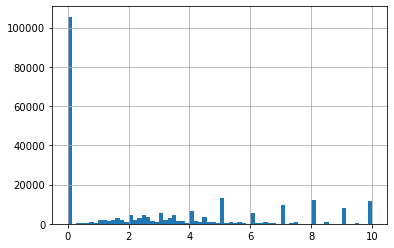

In [77]:
mean_of_Bookratings['Book-Rating'].hist(bins=70)

Many books are rated  1.5 to 4, the distribution is normalized.

In [78]:
number_of_Bookratings = df_BookRating.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [79]:
number_of_Bookratings = number_of_Bookratings[number_of_Bookratings['Book-Rating'] >= 30]
number_of_Bookratings.rename(columns={'Book-Rating': 'Number of Rating'}, inplace=True)
number_of_Bookratings

,Book-Title,Number of Rating
75,'Salem's Lot,47
203,10 Lb. Penalty,61
422,101 Dalmatians,37
697,16 Lighthouse Road,65
764,1984,284
...,...,...
240668,Zoya,103
240860,"\O\"" Is for Outlaw""",269
240874,"\Surely You're Joking, Mr. Feynman!\"": Adventu...",57
240955,e,44


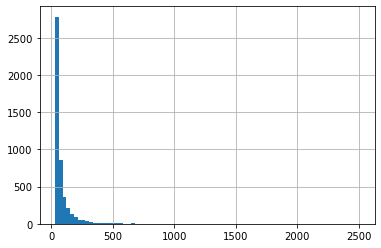

In [80]:
number_of_Bookratings['Number of Rating'].hist(bins=80)

In [81]:
number_of_Bookratings.describe()

,Number of Rating
count,4674.000000
mean,79.644416
std,89.242082
min,30.000000
25%,37.000000
50%,51.000000
75%,85.000000
max,2502.000000


After a basic filtering, the highest number of rating to a book is 2502, the lowest number is 30 and the average rating number is 73.

In [82]:
df_BookRating = df_BookRating.merge(number_of_Bookratings, on = 'Book-Title')
df_BookRating

,ISBN,Book-Title,Book-Author,Publisher,User-ID,Book-Rating,Number of Rating
0,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,8,0,311
1,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,11676,9,311
2,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,29526,9,311
3,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,36836,0,311
4,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,46398,9,311
...,...,...,...,...,...,...,...
372253,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,Zondervan Publishing Company,256407,9,79
372254,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,Zondervan Publishing Company,257700,9,79
372255,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,Zondervan Publishing Company,270006,0,79
372256,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,Zondervan Publishing Company,272810,8,79


In [83]:
df_BookRating.drop_duplicates(['User-ID', 'Book-Title'], inplace=True)
df_BookRating.shape

(368526, 7)

### Collaborative Filtering Based Recommender

In [84]:
# transform data frame from long to wide
df_BookRating_pivot = df_BookRating.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
df_BookRating_pivot.fillna(0, inplace=True)
df_BookRating_pivot

User-ID,8,9,10,14,16,17,19,23,26,32,...,278831,278832,278836,278838,278843,278844,278846,278849,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
number_of_Bookratings.sort_values('Number of Rating',ascending=False).head(10)

,Book-Title,Number of Rating
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
27922,Bridget Jones's Diary,815
206502,The Secret Life of Bees,774
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
204387,The Red Tent (Bestselling Backlist),723
14392,Angels &amp; Demons,670


In [86]:
# using SVD to compress 
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_coll = svd.fit_transform(df_BookRating_pivot)
df_latent_matrix_coll = pd.DataFrame(
                             latent_matrix_coll,index=number_of_Bookratings['Book-Title'].tolist())

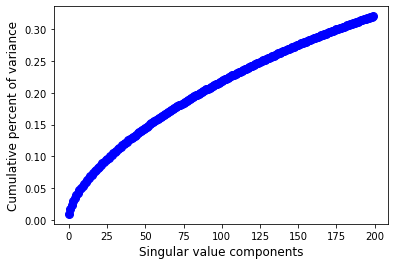

In [87]:
# plot variance explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='Blue')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [88]:
df_latent_matrix_coll

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
'Salem's Lot,2.330675,1.829366,-0.813723,-3.069870,-4.633398,2.803661,1.110165,-2.570099,-1.281501,1.575693,...,1.087466,1.170725,-0.144701,-1.146086,-0.550787,0.763128,-0.710770,0.609381,0.542694,-0.139023
10 Lb. Penalty,1.506809,0.598092,-0.497327,-0.580721,0.054428,0.116107,0.402000,1.466215,-0.819724,-2.161298,...,0.571890,0.320969,1.560618,-0.429172,-0.407897,-0.442197,-0.152457,0.163024,-1.197610,1.000394
101 Dalmatians,1.567797,0.728125,0.081592,-1.086777,-1.503762,0.401594,-0.597114,-0.009788,-0.748562,0.380995,...,0.034667,-0.441450,-0.187413,1.494993,-0.010266,-0.276151,-0.356586,1.048902,-0.005858,-0.333726
16 Lighthouse Road,3.120439,-0.233577,-1.446255,-5.963841,5.549481,-3.727928,0.687639,-4.482462,-1.076496,-2.218566,...,-0.272145,-0.000601,-0.096555,0.578142,-0.088635,0.135615,-0.500514,-0.345352,-0.580178,0.503782
1984,11.202270,10.336664,2.477904,2.179614,-12.801357,1.419426,1.423657,-10.745197,1.052807,-10.666936,...,-2.173852,2.488707,-2.006191,-1.909494,4.466250,-0.945577,2.386226,3.124599,3.876389,-2.598591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,7.731339,-2.946964,-0.949072,-0.809151,0.217947,-0.304668,-2.117516,3.117529,2.608862,3.339067,...,0.592851,0.340018,0.711417,-0.900751,-0.360549,1.613435,0.794536,-0.507250,0.025977,-0.107202
"\O\"" Is for Outlaw""",12.665428,-1.664784,-1.926990,-3.702033,-3.319159,1.627067,-4.694118,10.625515,-3.335823,0.543941,...,-1.543000,-3.285096,0.589442,2.812048,-4.456954,3.766432,-2.254729,-5.309244,0.891049,-2.713299
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",5.685000,-3.414629,-1.063639,3.269397,0.151883,1.102022,0.637541,-0.596135,0.517895,-0.667818,...,1.531817,-0.329623,0.093377,-0.753006,0.573846,-0.243216,2.000148,-0.546186,-0.251123,-1.988591
e,2.115227,1.503750,0.789575,0.589348,-1.401867,0.136173,-0.360974,-0.518189,-0.174205,-1.670721,...,0.117782,0.138261,0.601832,-0.339624,0.227180,-0.277965,-0.165194,-0.588495,-0.275168,-0.343169


### Running a collaborative cosine Similarity

In [89]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# take the latent vectors for a selected book from collaborative matrixes
a = np.array(df_latent_matrix_coll.loc['A Painted House']).reshape(1, -1)

# calculate the similartity of this book with the others in the list
score = cosine_similarity(df_latent_matrix_coll, a).reshape(-1)

# form a data frame of similar books 
dictDf = {'collaborative': score} 
similar = pd.DataFrame(dictDf, index = df_latent_matrix_coll.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('collaborative', ascending=False, inplace=True)

similar.head(11)
#similar[1:].head(11)

,collaborative
A Painted House,1.000000
Everything to Gain,0.381669
Notorious,0.338313
All Fall Down,0.325712
Fall on Your Knees (Oprah's Book Club),0.314255
No Witnesses: A Novel,0.291536
Marrying the Mistress,0.289415
"Nora, Nora: A Novel",0.249364
"Night of the Living Dummy (Goosebumps, No 7)",0.242308
Above the Law: A Novel,0.237136


In [90]:
similar = similar.reset_index().rename(columns={'index':'Book-Title'})

In [91]:
similar.merge(number_of_Bookratings, on = 'Book-Title').head(11).merge(mean_of_Bookratings, on = 'Book-Title' )

,Book-Title,collaborative,Number of Rating,Book-Rating
0,A Painted House,1.000000,838,3.231504
1,Everything to Gain,0.381669,43,1.186047
2,Notorious,0.338313,32,1.781250
3,All Fall Down,0.325712,43,2.093023
4,Fall on Your Knees (Oprah's Book Club),0.314255,45,2.533333
5,No Witnesses: A Novel,0.291536,31,2.967742
6,Marrying the Mistress,0.289415,31,2.516129
7,"Nora, Nora: A Novel",0.249364,84,2.785714
8,"Night of the Living Dummy (Goosebumps, No 7)",0.242308,31,1.129032
9,Above the Law: A Novel,0.237136,42,3.119048


From the above table, we can think about that if a user like the book 'A Painted House', he/she might intereted in following ten books. 

By combining the Number of Rating and Book-Rating score, I would recommend the A Novel to him/her

# In conclusion